In [25]:
import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('admissions_data.csv')
df.columns = df.columns.str.strip()
features = df
features = features.drop('Serial No.', axis=1)
features = features.drop('Chance of Admit', axis=1)
print(features)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0          337          118                  4  4.5  4.5  9.65         1
1          324          107                  4  4.0  4.5  8.87         1
2          316          104                  3  3.0  3.5  8.00         1
3          322          110                  3  3.5  2.5  8.67         1
4          314          103                  2  2.0  3.0  8.21         0
..         ...          ...                ...  ...  ...   ...       ...
495        332          108                  5  4.5  4.0  9.02         1
496        337          117                  5  5.0  5.0  9.87         1
497        330          120                  5  4.5  5.0  9.56         1
498        312          103                  4  4.0  5.0  8.43         0
499        327          113                  4  4.5  4.5  9.04         0

[500 rows x 7 columns]


In [5]:
labels = df['Chance of Admit']
print(labels)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64


In [6]:
#break features and lables into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"features_train \n {features_train}")
print(f"features_test \n {features_test}")
print(f"lables_test \n {labels_test}")
print(f"lables_train \n {labels_train}")

features_train 
      GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
249        321          111                  3  3.5  4.0  8.83         1
433        316          111                  4  4.0  5.0  8.54         0
19         303          102                  3  3.5  3.0  8.50         0
322        314          107                  2  2.5  4.0  8.27         0
332        308          106                  3  3.5  2.5  8.21         1
..         ...          ...                ...  ...  ...   ...       ...
106        329          111                  4  4.5  4.5  9.18         1
270        306          105                  2  2.5  3.0  8.22         1
348        302           99                  1  2.0  2.0  7.25         0
435        309          105                  2  2.5  4.0  7.68         0
102        314          106                  2  4.0  3.5  8.25         0

[400 rows x 7 columns]
features_test 
      GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Res

In [7]:
#scale data so they follow the same range
features_scaler = StandardScaler()
features_train_scaled = features_scaler.fit_transform(features_train)
features_test_scaled = features_scaler.transform(features_test)
labels_scaler = StandardScaler()
labels_train_scaled = labels_scaler.fit_transform(labels_train.values.reshape(-1,1)).flatten()
labels_test_scaled = labels_scaler.transform(labels_test.values.reshape(-1,1)).flatten()

In [14]:
features_train_scaled_df = pd.DataFrame(features_train_scaled)
features_test_scaled_df = pd.DataFrame(features_test_scaled)

print(features_test_scaled_df)
print(features_train_scaled_df)

           0         1         2         3         4         5         6
0   1.576604  1.424271  0.775459  0.633979  0.021730  1.597217  0.895434
1  -0.248961  0.109306  0.775459  1.141162  0.564984  0.764683  0.895434
2  -0.157683 -0.383805 -0.972054 -1.394754 -1.064777 -1.549762 -1.116777
3  -0.431518  0.273677 -0.098298 -0.380387 -0.521524  0.181909 -1.116777
4   0.846378  0.766789 -0.098298  0.126796 -0.521524  0.781333  0.895434
..       ...       ...       ...       ...       ...       ...       ...
95 -1.618135 -2.191882 -1.845810 -2.409120 -2.694538 -2.065934 -1.116777
96 -0.157683 -0.219435 -0.098298  1.141162  0.021730 -0.267660 -1.116777
97  1.120212  1.095530 -0.972054 -1.394754  0.564984 -0.034550  0.895434
98  0.116152  0.438048 -1.845810 -0.887570  0.021730 -0.067852  0.895434
99 -0.248961 -0.383805 -0.098298  0.126796 -1.064777 -0.467468 -1.116777

[100 rows x 7 columns]
            0         1         2         3         4         5         6
0    0.389986  0.602418 -0

In [15]:
labels_train_scaled_df = pd.DataFrame(labels_train_scaled)
labels_test_scaled_df = pd.DataFrame(labels_test_scaled)

print(labels_train_scaled_df)
print(labels_test_scaled_df)

            0
0    0.326417
1   -0.100970
2   -0.742050
3   -0.029739
4    0.183954
..        ...
395  1.038728
396 -0.029739
397 -1.098206
398 -1.240668
399 -0.742050

[400 rows x 1 columns]
           0
0   1.466114
1   0.825034
2  -2.380366
3   0.326417
4   0.112723
..       ...
95 -2.166672
96 -0.029739
97 -0.029739
98 -0.385895
99 -1.311899

[100 rows x 1 columns]


In [19]:
def make_model(feat_train, labels_train):
    model = Sequential()
    model.add(Dense(64, input_dim=feat_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(26, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    model.fit(feat_train, labels_train, epochs=100, batch_size=32, validation_split=0.2)

    return model 

In [20]:
my_model = make_model(features_train_scaled, labels_train_scaled)
my_model.summary()

Epoch 1/100


/Users/nathaneldering/Desktop/my_projects/Python/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9986 - mean_squared_error: 0.9986 - val_loss: 0.6528 - val_mean_squared_error: 0.6528
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4944 - mean_squared_error: 0.4944 - val_loss: 0.3301 - val_mean_squared_error: 0.3301
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2931 - mean_squared_error: 0.2931 - val_loss: 0.1955 - val_mean_squared_error: 0.1955
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2275 - mean_squared_error: 0.2275 - val_loss: 0.1713 - val_mean_squared_error: 0.1713
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2278 - mean_squared_error: 0.2278 - val_loss: 0.1559 - val_mean_squared_error: 0.1559
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2238 - mean_squared_error: 0.2238 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1883 - mean_squared_error: 0.1883 - val_loss: 0.1432 - val_mean_squar

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │           858 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,433 (40.76 KB)

 Trainable params: 3,477 (13.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,956 (27.18 KB)

In [21]:
predictions = my_model.predict(features_test_scaled)
mse = mean_squared_error(labels_test_scaled, predictions)

r2 = r2_score(labels_test_scaled, predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [22]:
print(mse)
print(r2)

0.24336471673000826
0.7654556848762947


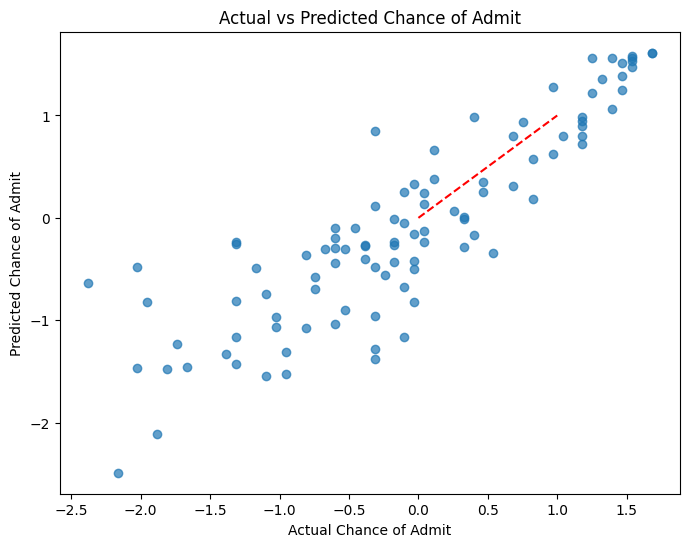

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(labels_test_scaled, predictions, alpha=0.7)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Chance of Admit")
plt.show()